**จุดประสงค์การเรียนรู้**

1. เพื่อศึกษาการสร้างเกมส์เบื้องต้น
2. เพื่อประยุกต์การใช้ List ในการทำงานกับเกมส์ 

ref: 
- https://www.youtube.com/watch?v=Tuka1XHx5jQ
- https://www.youtube.com/watch?v=iirDUDTkYAU&t=381s
- https://www.youtube.com/watch?v=lxKsMTzce9M
- https://www.youtube.com/watch?v=vK1NWIHIdNU&t=121s

**ขั้นตอนที่ 1 ทำการสร้าง Plane**

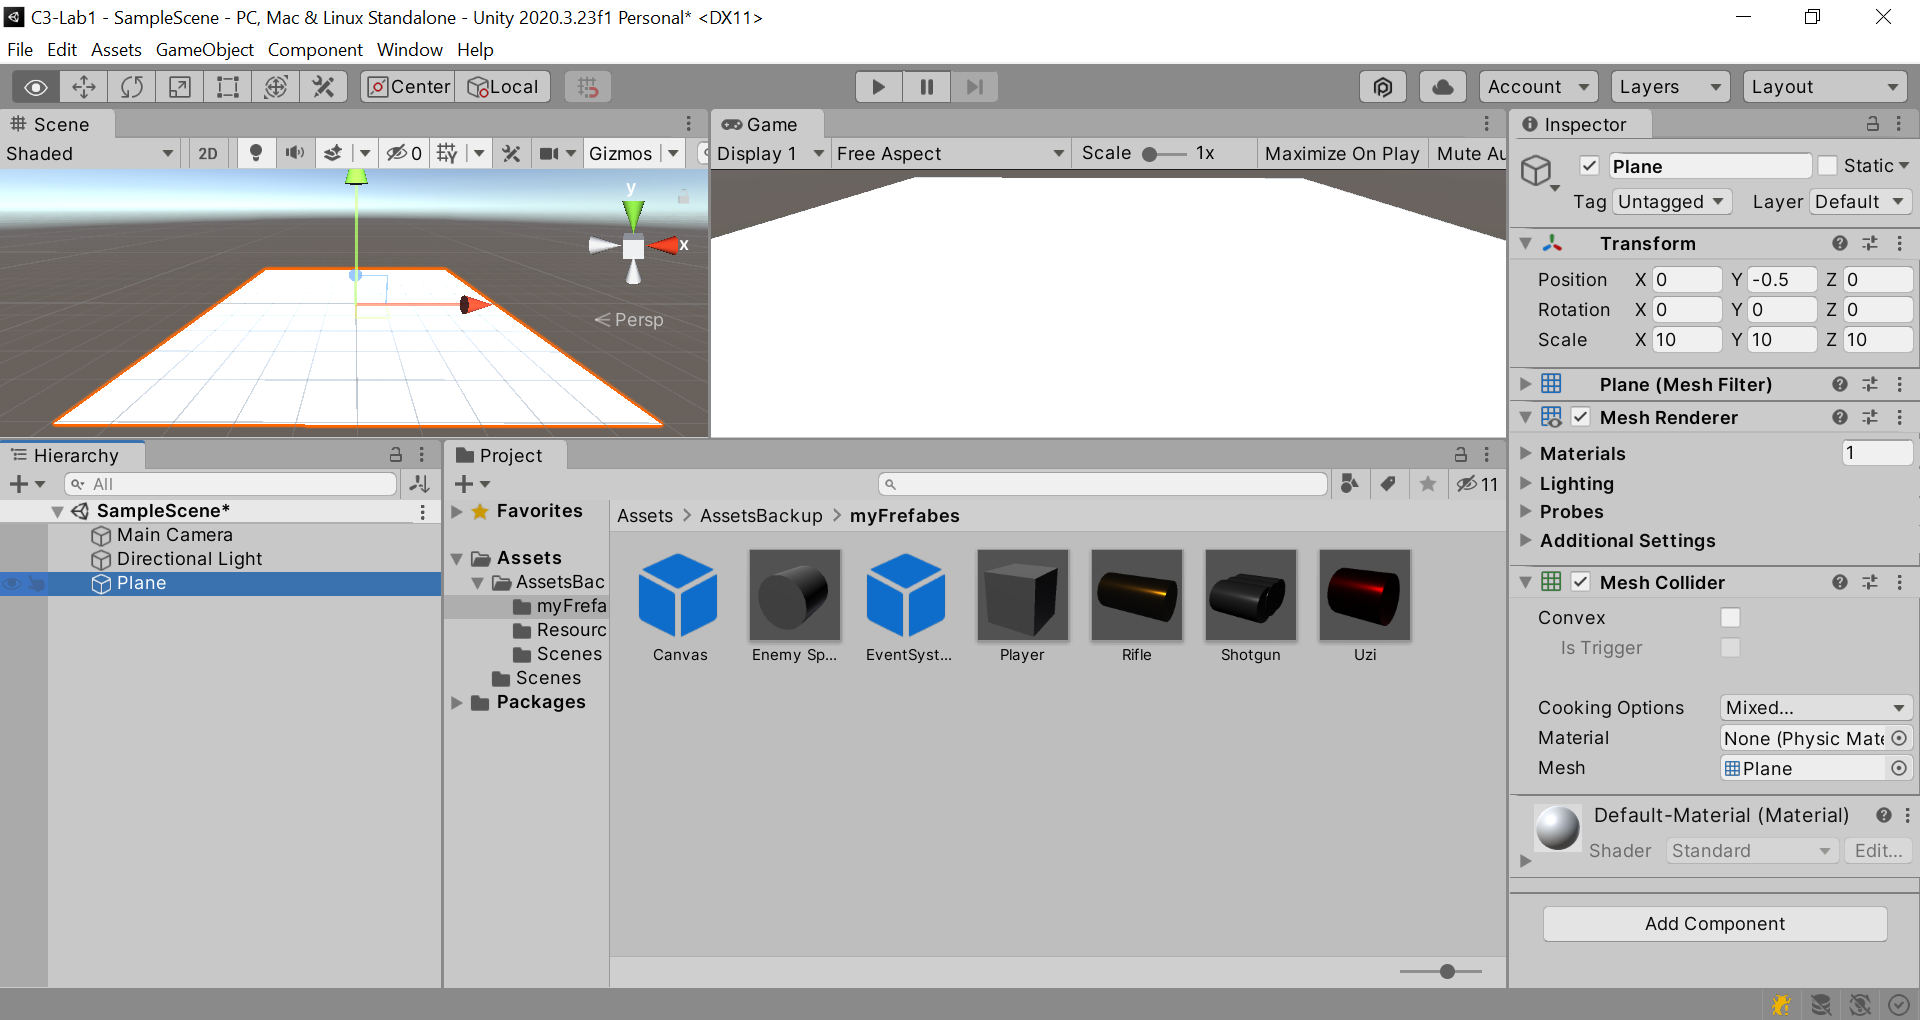

**ชั้นตอนที่ 2 ทำการเพิ่ม Event System**

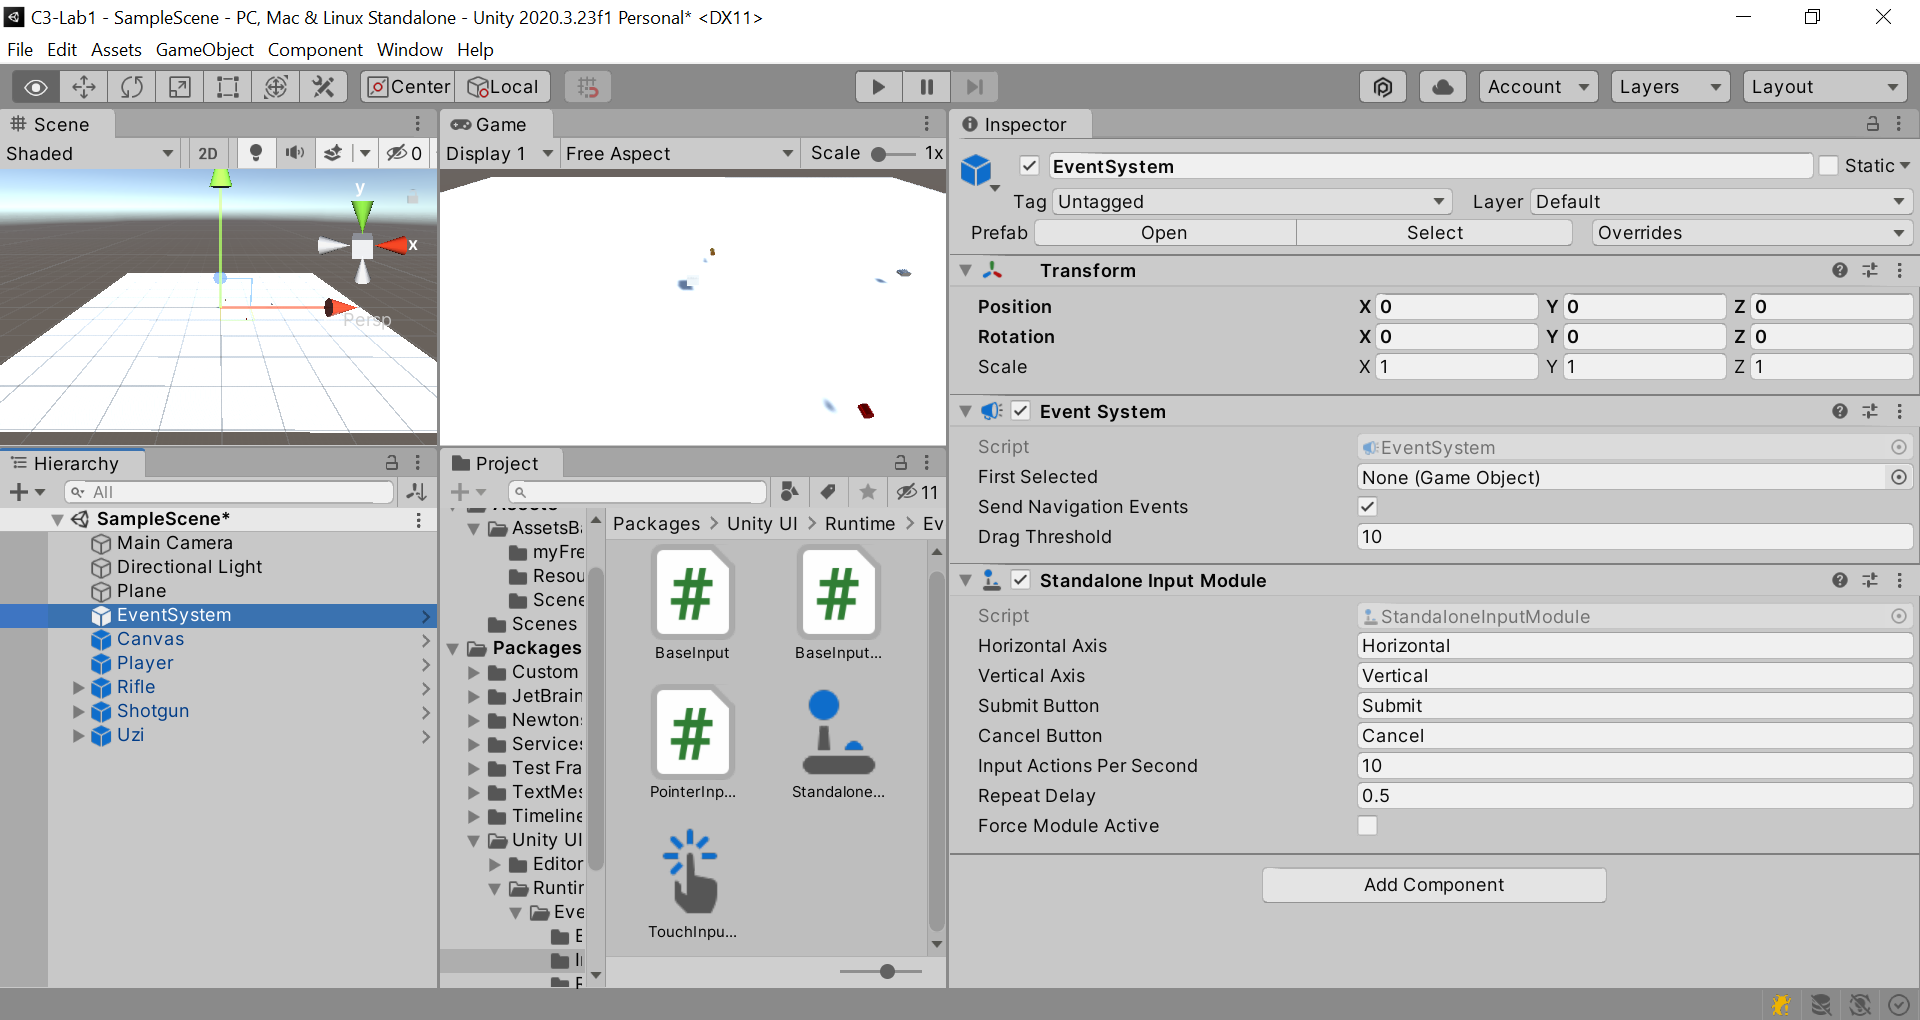

**ขั้นตอนที่ 3 ให้ทำการเพิ่ม Canvas**

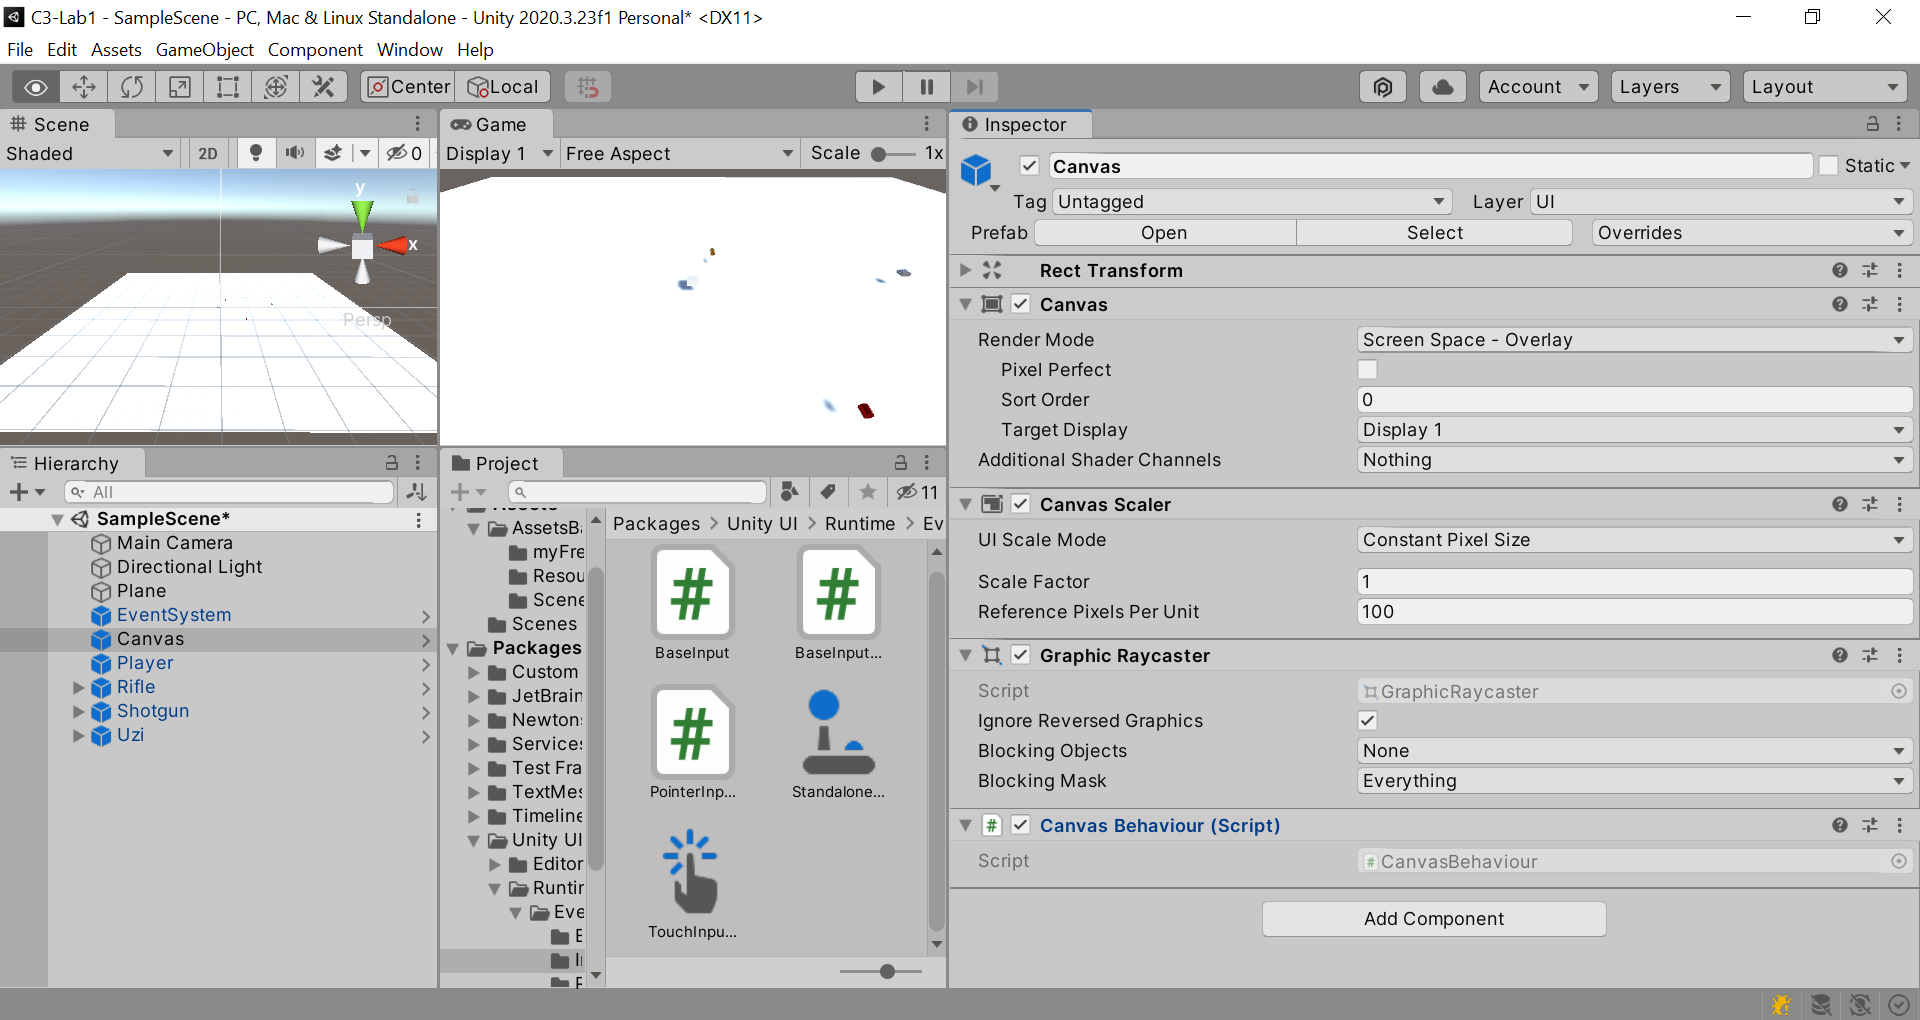

**การปรับมุมกล้อง**

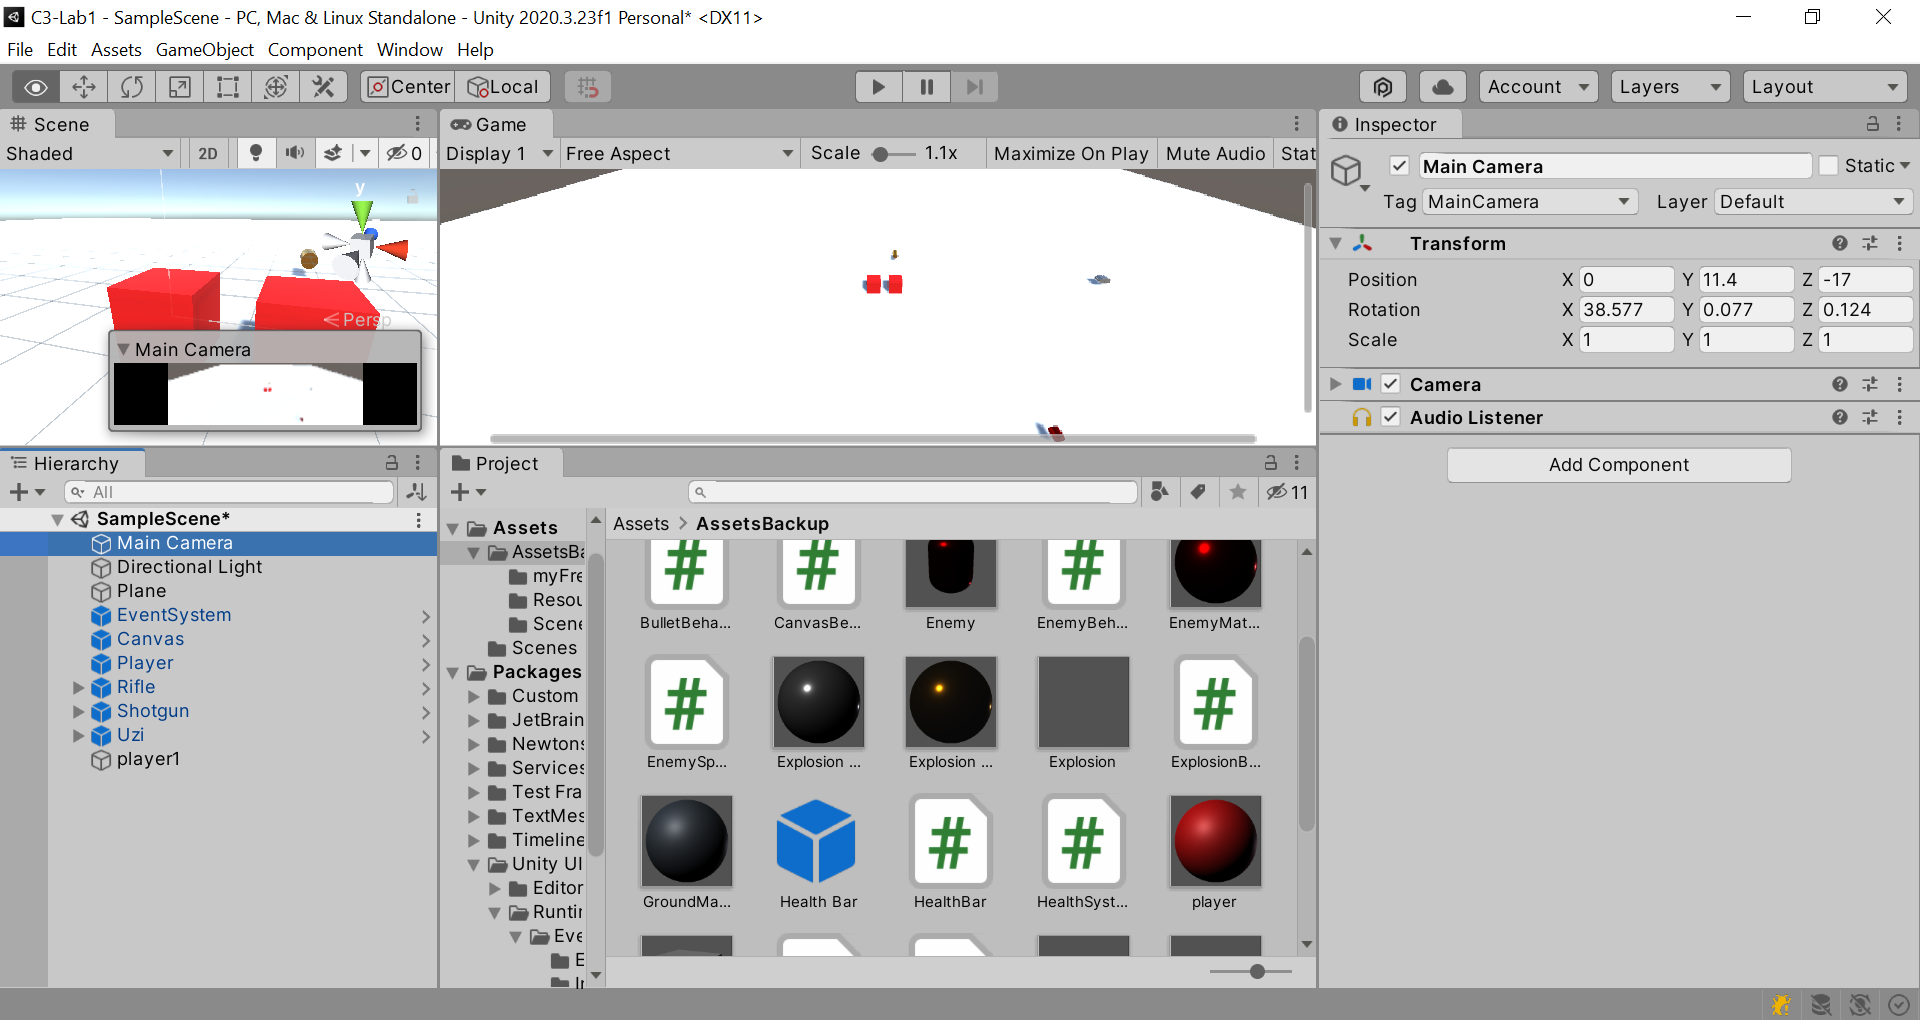

**การสร้าง Player**

**การสร้าง PlayerBehaviour**

In [ ]:
using System.Collections;
using System.Collections.Generic;
using UnityEngine;

public static class References 
{
    public static GameObject thePlayer;
    public static GameObject canvas;
}

**ทำให้แท่นปืนเกิดการเคลื่อนที่**

In [ ]:
using System.Collections;
using System.Collections.Generic;
using UnityEngine;

public class PlayerBehaviour : MonoBehaviour
{

    //Never set the value of a public variable here - the inspector will override it without telling you.
    //If you need to, set it in Start() instead

    public float speed; //'float' is short for floating point number, which is basically just a normal number

    // Start is called before the first frame update
    void Start()
    {
        References.thePlayer = gameObject;
    }

    // Update is called once per frame
    void Update()
    {

        //การเคลื่อนที่ของแท่นปืน
        Vector3 inputVector = new Vector3(Input.GetAxis("Horizontal"), 0, Input.GetAxis("Vertical"));
        Rigidbody ourRigidBody = GetComponent<Rigidbody>();
        ourRigidBody.velocity = inputVector * speed;
    }
 }

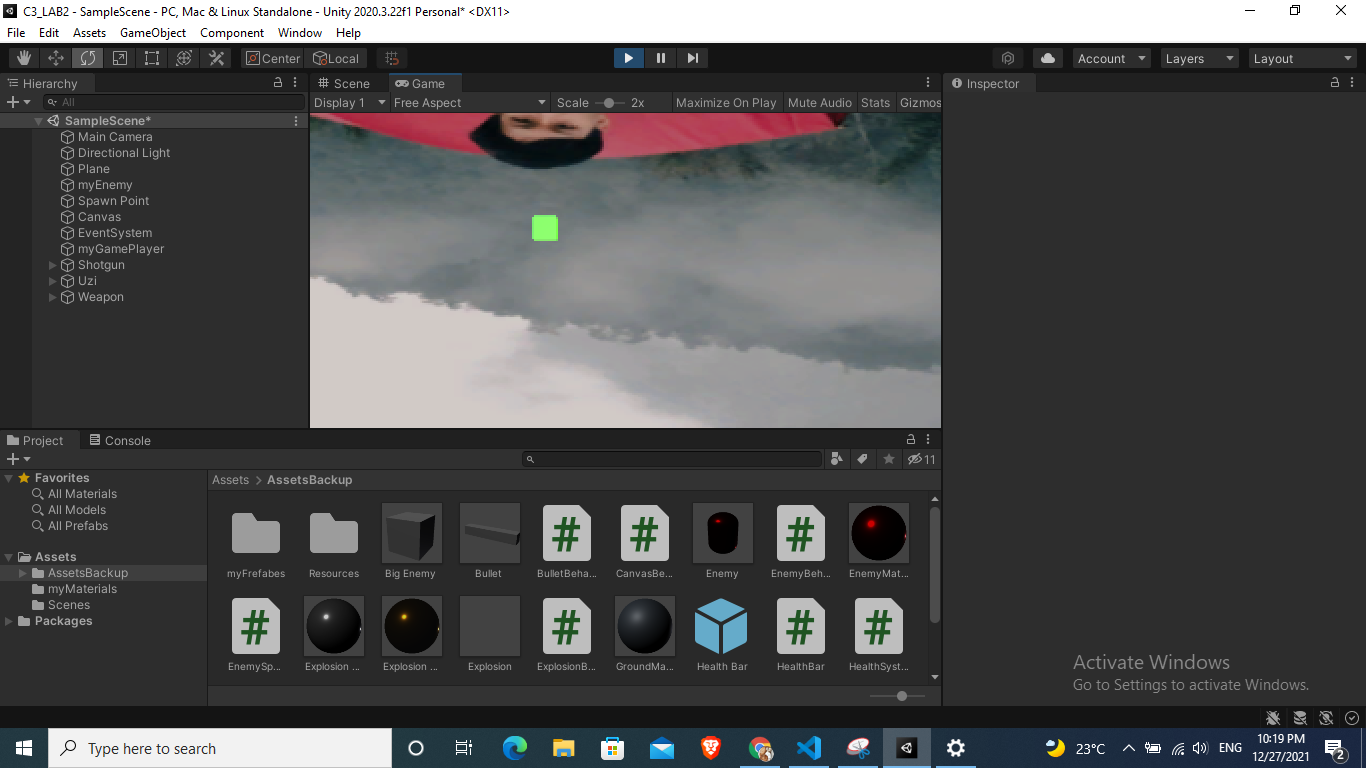

**ทำการหมุนแท่นปืนเป็นวงกลม**

In [ ]:
using System.Collections;
using System.Collections.Generic;
using UnityEngine;

public class PlayerBehaviour : MonoBehaviour
{

    //Never set the value of a public variable here - the inspector will override it without telling you.
    //If you need to, set it in Start() instead

    public float speed; //'float' is short for floating point number, which is basically just a normal number

    // Start is called before the first frame update
    void Start()
    {
        References.thePlayer = gameObject;
    }

    // Update is called once per frame
    void Update()
    {

        //การเคลื่อนที่ของแท่นปืน
        Vector3 inputVector = new Vector3(Input.GetAxis("Horizontal"), 0, Input.GetAxis("Vertical"));
        Rigidbody ourRigidBody = GetComponent<Rigidbody>();
        ourRigidBody.velocity = inputVector * speed;

        //การหมุนแท่นปืนเป็นวงกลม
        Ray rayFromCameraToCursor = Camera.main.ScreenPointToRay(Input.mousePosition);
        Plane playerPlane = new Plane(Vector3.up, transform.position);
        playerPlane.Raycast(rayFromCameraToCursor, out float distanceFromCamera);
        Vector3 cursorPosition = rayFromCameraToCursor.GetPoint(distanceFromCamera);
    }
 }

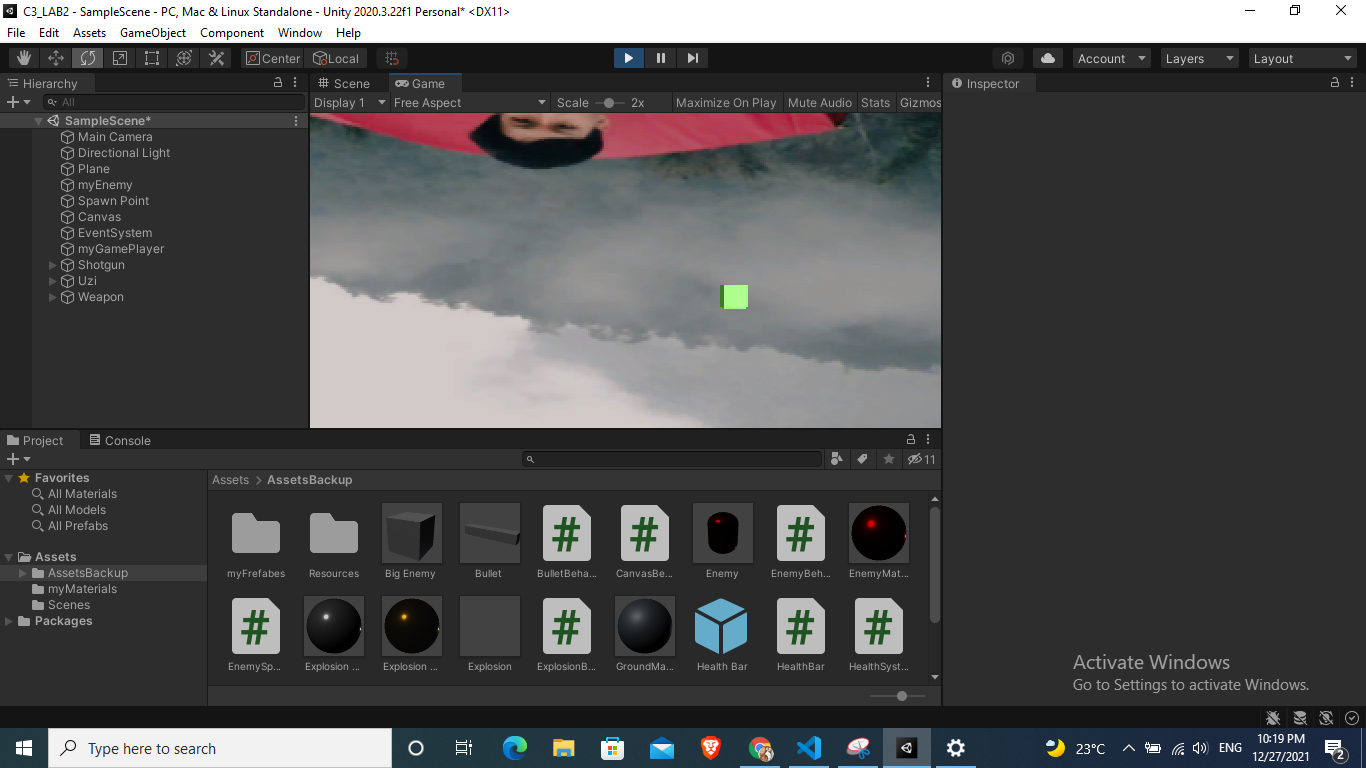

**ทำการเพิ่มอาวุธ**

In [ ]:
using System.Collections;
using System.Collections.Generic;
using UnityEngine;

public class PlayerBehaviour : MonoBehaviour
{

    //Never set the value of a public variable here - the inspector will override it without telling you.
    //If you need to, set it in Start() instead

    public float speed; //'float' is short for floating point number, which is basically just a normal number

    //สร้างตัวแปรเพื่อเก็บอาวุธ
    public List<WeaponBehaviour> weapons = new List<WeaponBehaviour>();
    //กำหนดตำแหน่งอาวุธ
    public int selectedWeaponIndex;

    // Start is called before the first frame update
    void Start()
    {
        References.thePlayer = gameObject;
        //กำหนดตำแหน่งแรกของอาวุธ
        selectedWeaponIndex = 0;
    }

    // Update is called once per frame
    void Update()
    {

        //การเคลื่อนที่ของแท่นปืน
        Vector3 inputVector = new Vector3(Input.GetAxis("Horizontal"), 0, Input.GetAxis("Vertical"));
        Rigidbody ourRigidBody = GetComponent<Rigidbody>();
        ourRigidBody.velocity = inputVector * speed;

        //การหมุนแท่นปืนเป็นวงกลม
        Ray rayFromCameraToCursor = Camera.main.ScreenPointToRay(Input.mousePosition);
        Plane playerPlane = new Plane(Vector3.up, transform.position);
        playerPlane.Raycast(rayFromCameraToCursor, out float distanceFromCamera);
        Vector3 cursorPosition = rayFromCameraToCursor.GetPoint(distanceFromCamera);
    }
 
    //เมื่อแท่นปืนชนเข้ากับอาวุธ
    private void OnTriggerEnter(Collider other)
    {
        WeaponBehaviour theirWeapon = other.GetComponentInParent<WeaponBehaviour>();
        if (theirWeapon != null)
        {
            //เพื่ออาวุธ
            weapons.Add(theirWeapon);
            //เปลี่ยนตำแหน่ง
            theirWeapon.transform.position = transform.position;
            theirWeapon.transform.rotation = transform.rotation;
            //เปลี่ยนให้อาวุธเป็นผู้ติดตาม
            theirWeapon.transform.SetParent(transform);
        }
    }
 }

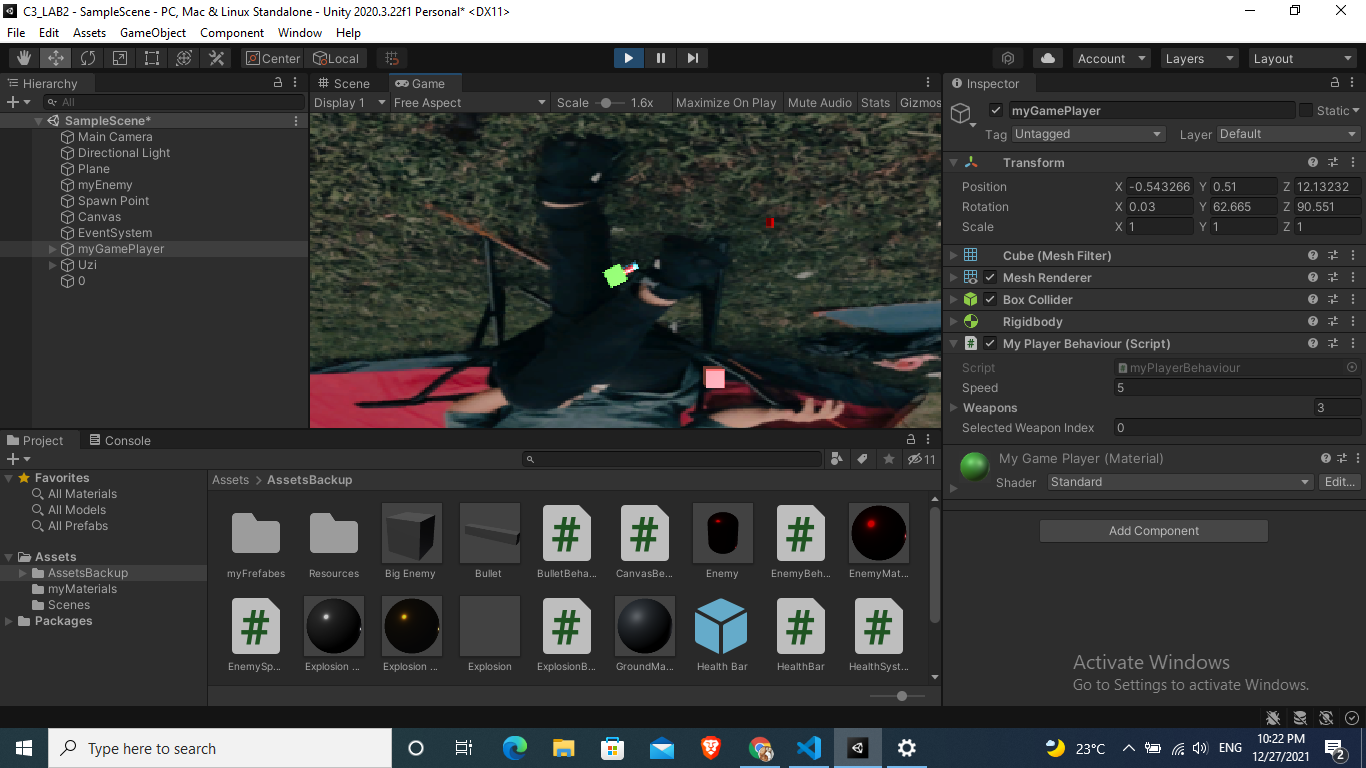

**กำหนดให้ยิงปืน**

In [ ]:
using System.Collections;
using System.Collections.Generic;
using UnityEngine;

public class PlayerBehaviour : MonoBehaviour
{

    //Never set the value of a public variable here - the inspector will override it without telling you.
    //If you need to, set it in Start() instead

    public float speed; //'float' is short for floating point number, which is basically just a normal number

    //สร้างตัวแปรเพื่อเก็บอาวุธ
    public List<WeaponBehaviour> weapons = new List<WeaponBehaviour>();
    //กำหนดตำแหน่งอาวุธ
    public int selectedWeaponIndex;

    // Start is called before the first frame update
    void Start()
    {
        References.thePlayer = gameObject;
        //กำหนดตำแหน่งแรกของอาวุธ
        selectedWeaponIndex = 0;
    }

    // Update is called once per frame
    void Update()
    {

        //การเคลื่อนที่ของแท่นปืน
        Vector3 inputVector = new Vector3(Input.GetAxis("Horizontal"), 0, Input.GetAxis("Vertical"));
        Rigidbody ourRigidBody = GetComponent<Rigidbody>();
        ourRigidBody.velocity = inputVector * speed;

        //การหมุนแท่นปืนเป็นวงกลม
        Ray rayFromCameraToCursor = Camera.main.ScreenPointToRay(Input.mousePosition);
        Plane playerPlane = new Plane(Vector3.up, transform.position);
        playerPlane.Raycast(rayFromCameraToCursor, out float distanceFromCamera);
        Vector3 cursorPosition = rayFromCameraToCursor.GetPoint(distanceFromCamera);
     
        //กำหนดให้กดปุ่มเม้าซ้ายยิงปืน
        if (weapons.Count > 0 && Input.GetButton("Fire1"))
        {
            //Tell our weapon to fire
            weapons[selectedWeaponIndex].Fire(cursorPosition);
        }
    }
 
    //เมื่อแท่นปืนชนเข้ากับอาวุธ
    private void OnTriggerEnter(Collider other)
    {
        WeaponBehaviour theirWeapon = other.GetComponentInParent<WeaponBehaviour>();
        if (theirWeapon != null)
        {
            //เพื่ออาวุธ
            weapons.Add(theirWeapon);
            //เปลี่ยนตำแหน่ง
            theirWeapon.transform.position = transform.position;
            theirWeapon.transform.rotation = transform.rotation;
            //เปลี่ยนให้อาวุธเป็นผู้ติดตาม
            theirWeapon.transform.SetParent(transform);
        }
    }
 }

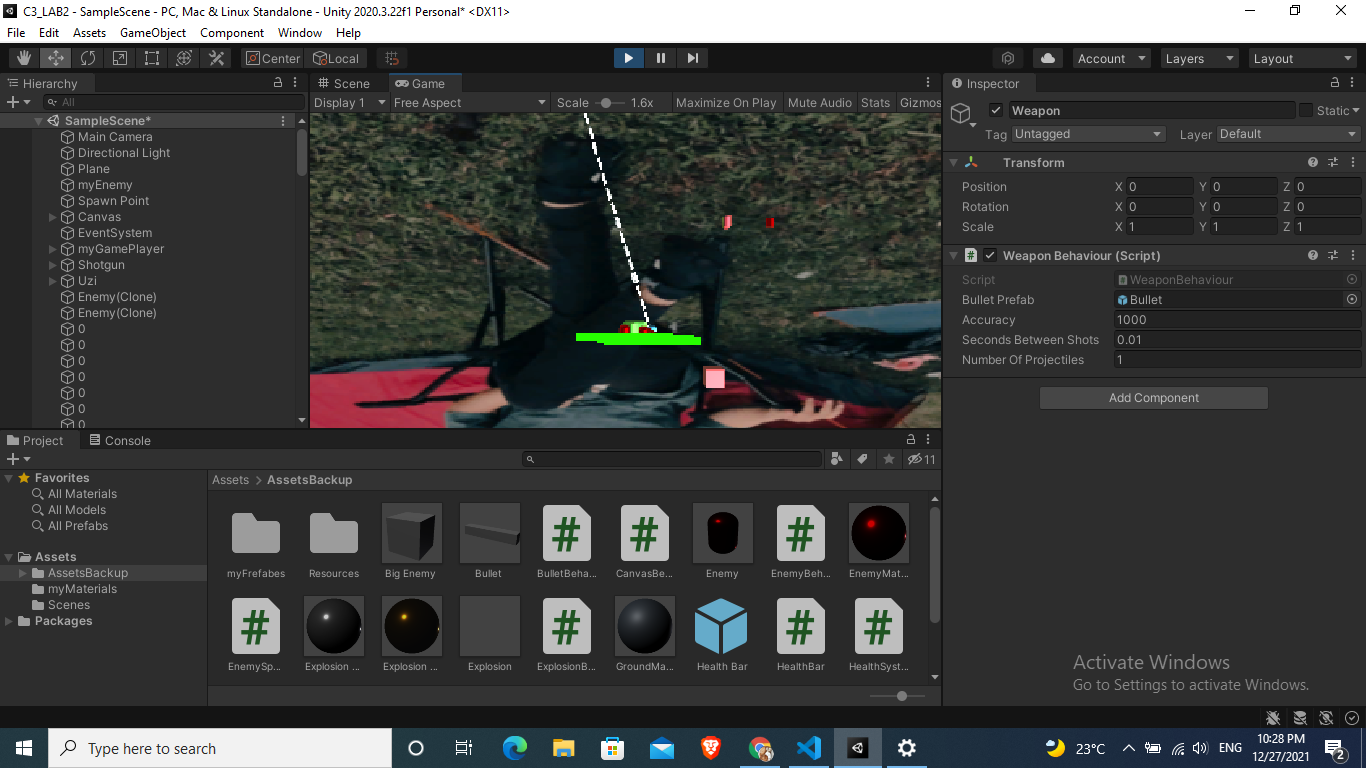

**ทำการเปลี่ยนอาวุธ ด้วยการคลิ๊กเม้าขวา**

In [ ]:
using System.Collections;
using System.Collections.Generic;
using UnityEngine;

public class PlayerBehaviour : MonoBehaviour
{

    //Never set the value of a public variable here - the inspector will override it without telling you.
    //If you need to, set it in Start() instead

    public float speed; //'float' is short for floating point number, which is basically just a normal number

    //สร้างตัวแปรเพื่อเก็บอาวุธ
    public List<WeaponBehaviour> weapons = new List<WeaponBehaviour>();
    //กำหนดตำแหน่งอาวุธ
    public int selectedWeaponIndex;

    // Start is called before the first frame update
    void Start()
    {
        References.thePlayer = gameObject;
        //กำหนดตำแหน่งแรกของอาวุธ
        selectedWeaponIndex = 0;
    }

    // Update is called once per frame
    void Update()
    {

        //การเคลื่อนที่ของแท่นปืน
        Vector3 inputVector = new Vector3(Input.GetAxis("Horizontal"), 0, Input.GetAxis("Vertical"));
        Rigidbody ourRigidBody = GetComponent<Rigidbody>();
        ourRigidBody.velocity = inputVector * speed;

        //การหมุนแท่นปืนเป็นวงกลม
        Ray rayFromCameraToCursor = Camera.main.ScreenPointToRay(Input.mousePosition);
        Plane playerPlane = new Plane(Vector3.up, transform.position);
        playerPlane.Raycast(rayFromCameraToCursor, out float distanceFromCamera);
        Vector3 cursorPosition = rayFromCameraToCursor.GetPoint(distanceFromCamera);
     

     
        //กำหนดให้กดปุ่มเม้าซ้ายยิงปืน
        if (weapons.Count > 0 && Input.GetButton("Fire1"))
        {
            //Tell our weapon to fire
            weapons[selectedWeaponIndex].Fire(cursorPosition);
        }
        //ทำการเปลี่ยนอาวุธกดปุ่มเมาขวา
        if (Input.GetButtonDown("Fire2"))
        {
            ChangeWeaponIndex(selectedWeaponIndex + 1);
        }
     
    }
 
    //เมื่อแท่นปืนชนเข้ากับอาวุธ
    private void OnTriggerEnter(Collider other)
    {
        WeaponBehaviour theirWeapon = other.GetComponentInParent<WeaponBehaviour>();
        if (theirWeapon != null)
        {
            //เพื่ออาวุธ
            weapons.Add(theirWeapon);
            //เปลี่ยนตำแหน่ง
            theirWeapon.transform.position = transform.position;
            theirWeapon.transform.rotation = transform.rotation;
            //เปลี่ยนให้อาวุธเป็นผู้ติดตาม
            theirWeapon.transform.SetParent(transform);
        }
    }//สิ้นสุด
 


    //ทำการเปลี่ยนอาวุธ
    private void ChangeWeaponIndex(int index)
    {

        //Change our index
        selectedWeaponIndex = index;
        //If it's gone too far, loop back around
        if (selectedWeaponIndex >= weapons.Count)
        {
            selectedWeaponIndex = 0;
        }

        //For each weapon in our list
        for (
            int i = 0; //Declare a variable to keep track of how many iterations we've done
            i < weapons.Count; //Set a limit for how high this variable can go
            i++ //Run this after each time we iterate - increase the iteration count
        )
        {
            if (i == selectedWeaponIndex)
            {
                //If it's the one we just selected, make it visible - 'enable' it
                weapons[i].gameObject.SetActive(true);
            } else
            {
                //If it's not the one we just selected, hide it - disable it.
                weapons[i].gameObject.SetActive(false);
            }
        }
    }//สิ้นสุด
 }

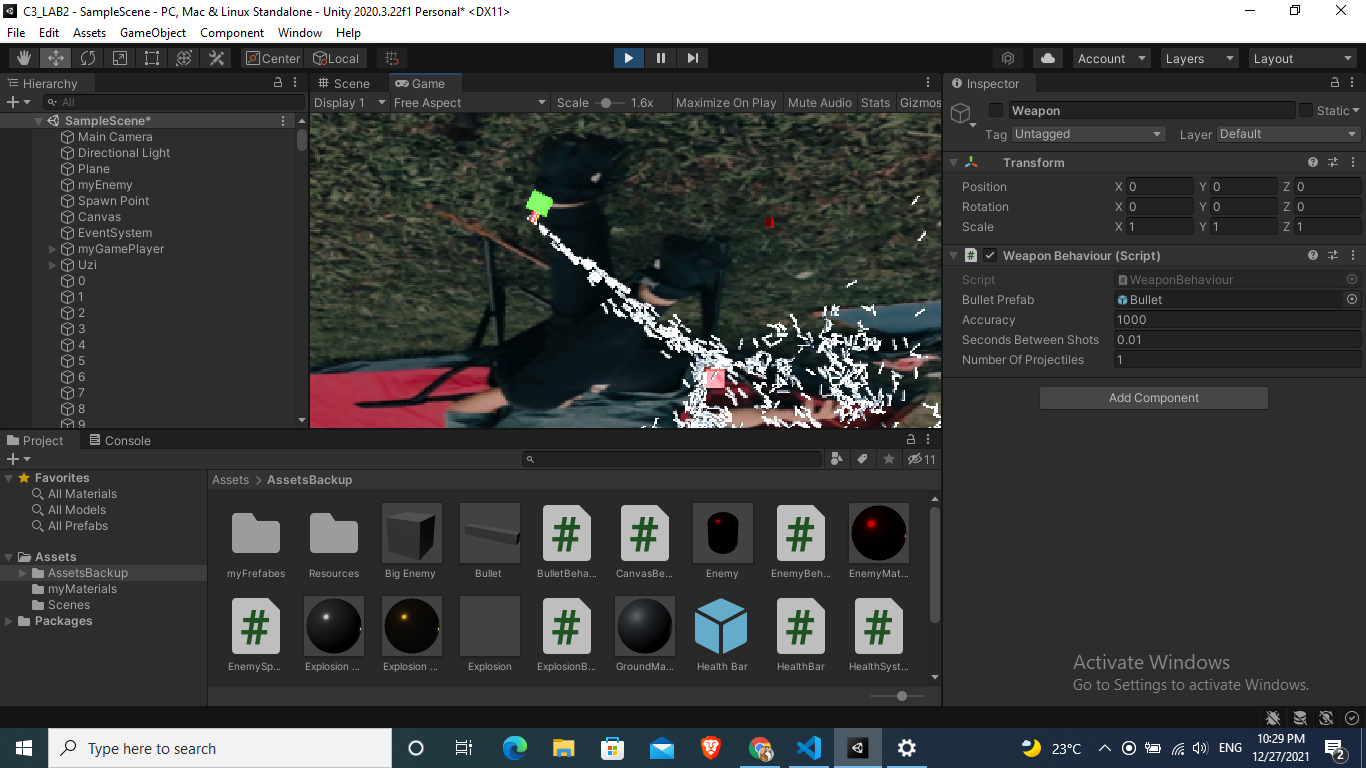

**การสร้าง HealthSystem**

In [ ]:
using System.Collections;
using System.Collections.Generic;
using UnityEngine;
using UnityEngine.Serialization;

public class HealthSystem : MonoBehaviour
{

    [FormerlySerializedAs("health")] //We write this to tell Unity not to lose our data when we rename a variable. This was its old name
    public float maxHealth;
    
    float currentHealth;

    public GameObject healthBarPrefab;

    public GameObject deathEffectPrefab;

    HealthBar myHealthBar;

    // Start is called before the first frame update
    void Start()
    {
        currentHealth = maxHealth;
        //Create our health panel ON the canvas References.canvas
        GameObject healthBarObject = Instantiate(healthBarPrefab, References.canvas.transform);
        myHealthBar = healthBarObject.GetComponent<HealthBar>();

    }

    public void TakeDamage(float damageAmount)
    {

        if (currentHealth > 0)
        {
            currentHealth -= damageAmount;

            if (currentHealth <= 0)
            {
                if (deathEffectPrefab != null)
                {
                    Instantiate(deathEffectPrefab, transform.position, transform.rotation);
                }
                Destroy(gameObject);

            }
        }

    }

    private void OnDestroy()
    {
        //Don't create anything in the ondestroy event - it's only for cleaning up after yourself
        if (myHealthBar != null)
        {
            Destroy(myHealthBar.gameObject);
        }
    }

    // Update is called once per frame
    void Update()
    {
        //Make our healthbar reflect our health - 
        myHealthBar.ShowHealthFraction(currentHealth / maxHealth);
        //Make our healthbar follow us - move it to our current position
        myHealthBar.transform.position = Camera.main.WorldToScreenPoint(transform.position + Vector3.up * 2);
    }
}

In [ ]:
using System.Collections;
using System.Collections.Generic;
using UnityEngine;
using UnityEngine.UI;

public class HealthBar : MonoBehaviour
{
    public Image filledPart;
    public void ShowHealthFraction(float fraction)
    {
        //Scales the fillepart to the fraction provided.
        filledPart.rectTransform.localScale = new Vector3(fraction, 1, 1);
    }

    // Start is called before the first frame update
    void Start()
    {
        
    }

    // Update is called once per frame
    void Update()
    {

    }
}


**การเพิ่มอาวุธในการยิงสำหรับ player**

In [ ]:
using System.Collections;
using System.Collections.Generic;
using UnityEngine;

public class WeaponBehaviour : MonoBehaviour
{
    public GameObject bulletPrefab;
    public float accuracy;
    public float secondsBetweenShots;
    public float numberOfProjectiles;
    float secondsSinceLastShot;

    // Start is called before the first frame update
    void Start()
    {
        secondsSinceLastShot = secondsBetweenShots;
    }

    // Update is called once per frame
    void Update()
    {
        //Firing
        secondsSinceLastShot += Time.deltaTime;

    }

    public void Fire(Vector3 targetPosition)
    {
        if (secondsSinceLastShot >= secondsBetweenShots)
        {
            //Ready to fire
            for (
                int iterationCount = 0; //Declare a variable to keep track of how many iterations we've done
                iterationCount < numberOfProjectiles; //Set a limit for how high this variable can go
                iterationCount++ //Run this after each time we iterate - increase the iteration count
            )
            {
                GameObject newBullet = Instantiate(bulletPrefab, transform.position + transform.forward, transform.rotation);
                //Offset that target position by a random amount, according to our inaccuracy
                float inaccuracy = Vector3.Distance(transform.position, targetPosition) / accuracy;
                Vector3 inaccuratePosition = targetPosition;
                inaccuratePosition.x += Random.Range(-inaccuracy, inaccuracy);
                inaccuratePosition.z += Random.Range(-inaccuracy, inaccuracy);
                newBullet.transform.LookAt(inaccuratePosition);
                secondsSinceLastShot = 0;
                newBullet.name = iterationCount.ToString();
            }
        }
    }
}


**ลูกกระสุน Bullet**

In [ ]:
using System.Collections;
using System.Collections.Generic;
using UnityEngine;

public class BulletBehaviour : MonoBehaviour
{
    public float bulletSpeed;
    public float secondsUntilDestroyed;
    public float damage;

    // Start is called before the first frame update
    void Start()
    {
        Rigidbody ourRigidBody = GetComponent<Rigidbody>();
        ourRigidBody.velocity = transform.forward * bulletSpeed;
    }

    // Update is called once per frame
    void Update()
    {
        secondsUntilDestroyed -= Time.deltaTime;

        if (secondsUntilDestroyed < 1)
        {
            transform.localScale *= secondsUntilDestroyed;
        }

        if (secondsUntilDestroyed < 0)
        {
            Destroy(gameObject);
        }
    }

    private void OnCollisionEnter(Collision thisCollision)
    {
        GameObject theirGameObject = thisCollision.gameObject;

        if (theirGameObject.GetComponent<EnemyBehaviour>() != null)
        {
            HealthSystem theirHealthSystem = theirGameObject.GetComponent<HealthSystem>();
            if (theirHealthSystem != null)
            {
                theirHealthSystem.TakeDamage(damage);
            }
            Destroy(gameObject);
        }
    }
}


**การเพิ่ม Enermy ลงไปในเกมส์**

In [ ]:
using System.Collections;
using System.Collections.Generic;
using UnityEngine;

public class EnemySpawner : MonoBehaviour
{

    public GameObject spawnPoint;
    public GameObject enemyPrefab;
    public float secondsBetweenSpawns;
    float secondsSinceLastSpawn;

    // Start is called before the first frame update
    void Start()
    {
        secondsSinceLastSpawn = 0;
    }

    //Fixed update happens the same number of times for all players, so it's a good place for gameplay critical things.
    private void FixedUpdate()
    {
        secondsSinceLastSpawn += Time.fixedDeltaTime;
        if (secondsSinceLastSpawn >= secondsBetweenSpawns)
        {
            Instantiate(enemyPrefab, spawnPoint.transform.position, spawnPoint.transform.rotation);
            secondsSinceLastSpawn = 0;
        }
    }
}

**งานที่ทำสำหรับ C3-Lab1**

1. ให้ทำการเพิ่ม Texture ลงไปที่ plane โดยเปลี่ยนเป็นรูปนักศึกษา (5 คะแนน)
2. ให้ทำการเพิ่ม อาวุธ อย่างน้อย 3 อาวุธ โดยเพิ่มอาวุธใดก็ได้ (5 คะแนน)
3. ให้ทำการเปลี่ยนการเก็บข้อมูลแบบ List ให้เป็นแบบ Array (10 คะแนน)
4. ให้ทำการจัดส่งงานในรูปแบบ GitHub (5 คะแนน)
การส่งงานให้ส่งภายในวันจันทร์ที่ 20 ธันวาคม 2564 เวลาไม่เกิน 24.00 น.